### Preganancy data prediction & interpretability: Term or pre-term.

The question relates to cool data set of 2000 women's pregnancies with bio and demo data about the patients.   
Target is whether the woman had a term or pre-term birth.  
The AUC was .83 on training, but much lower on production.  
So we are hoping you can provide a perspective on why and if we can do anything in the future to improve it. 

#### This version: Updated 08052019: Droped more columns for testing:
'Training =1, Validation = 2', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Current Illicit Drug User', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes'

<img src="Image/structure_Classification.png">

### Preq

In [2]:
# imports
import h2o 
import numpy as np
import pandas as pd
from collections import Counter 
import seaborn as sns
from heapq import nlargest 

# display matplotlib graphics in notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# start h2o
h2o.remove_all()
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.144-b01, mixed mode)
  Starting server from c:\python37\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmp9utr7ln2
  JVM stdout: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmp9utr7ln2\h2o_Zi_Wei_Fan_started_from_python.out
  JVM stderr: C:\Users\ZIWEIF~1\AppData\Local\Temp\tmp9utr7ln2\h2o_Zi_Wei_Fan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.5
H2O cluster version age:,5 months !!!
H2O cluster name:,H2O_from_python_Zi_Wei_Fan_j19hp6
H2O cluster total nodes:,1
H2O cluster free memory:,1.747 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


### Read the Training & Production data.

In [49]:
path_training = 'data/Compiled_list_for_AI_training.csv'
frame_training = h2o.import_file(path=path_training)

path_production = 'data/nir_validation.csv'
frame_production = h2o.import_file(path=path_production)

pd.options.display.max_columns = None

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
training_seq_no = frame_training['Seq no']
production_seq_no = frame_production['Seq no']

- Drop 'Seq No.', 'Training =1, Validation = 2' and for binary classification, 
- Categorize lables to be a factor.

In [51]:
target='Gestational Category at Delivery'

In [52]:
frame_training = frame_training.drop('Seq no')
frame_production = frame_production.drop('Seq no')

frame_training.head(3)

Gestational Category at Delivery,"Training =1, Validation = 2",Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Caucasian,Central Asian,East Asian,African,Pacific Islander,Indigenous Australian,"Multiple Pregnancy (twins, triplets)",Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Current Illicit Drug User,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Cervical Sludge,Cervical Funnelling,Cervical Beaking,Cervical Blackline Appearance,Microbiology Culture,Candida / Fungal Species,Ureaplasma Species,Group B Strep,Bacterial Vaginosis,Other (see notes),Microbiology Notes,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,1,20.86,36.66,3,1,29.6,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,No,No,No,No,No,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,1,23.57,26.26,3,2,31,Yes,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,Done,Yes,No,No,No,No,GBS not reported,No,No,No,No,No,No,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222
Term,1,20.29,38.99,2,0,24.6,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),,,,,Not done,,,,,,,No,Yes,No,Yes,No,No,145.187,100.242,0.03125,1.64485,21.5582,0.15625,74.4387,14553.9,4.53709,238.811,3129.96,22.6855,10807.5,3.13257,164.883,2161.04,15.6629,7461.91,0.0514015,0.673692,0.00488281,2.32621,35.4599,0.257008,122.44,3.36846,1604.76,11.6311,12.2552,5.72527,0.00155872,5,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.12331,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.01339

In [53]:
frame_training[target].asfactor()
frame_training[target].types

{'Gestational Category at Delivery': 'enum'}

### <font color='red'>Session 1: Comparison training & production. </font>

#### 1.0: convert to pd frame for some pre-processing

In [54]:
pd_frame_training = frame_training.as_data_frame()
pd_frame_production = frame_production.as_data_frame()

#### + Updated 08052019: Droped more columns for testing:  
'Training =1, Validation = 2', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Current Illicit Drug User', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes'

In [55]:
list_features_dropped = ['Training =1, Validation = 2', 'Caucasian', 'Central Asian', 'East Asian', 'African', 'Pacific Islander', 'Indigenous Australian', 'Multiple Pregnancy (twins, triplets)', 'Current Illicit Drug User', 'Cervical Sludge', 'Cervical Funnelling', 'Cervical Beaking', 'Cervical Blackline Appearance', 'Microbiology Culture', 'Candida / Fungal Species', 'Ureaplasma Species', 'Group B Strep', 'Bacterial Vaginosis', 'Other (see notes)', 'Microbiology Notes']

In [56]:
pd_frame_training = pd_frame_training.drop(list_features_dropped, axis=1)
pd_frame_production = pd_frame_production.drop(list_features_dropped, axis=1)

In [64]:
pd_frame_training.head(3)

,Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,Term,20.86,36.66,3,1,29.6,No,Yes,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,No,No,106.457,299.309745,1.054872,3.620242,50.986506,12.194384,58.529598,3.186362e+04,112.298508,385.400067,5.427870e+03,1298.177537,6230.885414,315.733469,1083.573610,1.526076e+04,3649.897965,17518.479050,3.818892,53.784238,12.863514,61.741234,184.583473,44.146617,211.891289,621.749033,2984.219700,713.732393,21.065801,28.822703,0.040742,11.560060,0.526458,0.397284,0.659151,0.781434,0.715270,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.085195,1.019030,1.011378,1.141313,1.133662,1.067497,0.746046,1.007914,1.130197,1.064032,1.056381,0.878740,1.001023,0.934858,0.927207,1.262890,1.196725,1.189074,1.319009,1.311357,1.245192,1.049806,1.172090,1.105925,1.098274,1.433957,1.367792,1.360141,1.490076,1.482424,1.416259,1.304783,1.238618,1.230967,1.360901,1.353250,1.287085,1.622769,1.615117,1.548952,1.671236,0.061974,0.039020,0.085553,0.107282,0.095525,0.094165,0.076584,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
1,Term,23.57,26.26,3,2,31.0,Yes,No,Yes,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,No,No,No,1322.586,2453.526700,120.710130,1.395467,1778.650800,69.108300,74.400800,3.245000e+06,159649.528000,1845.624677,2.352419e+06,91401.670060,98401.456470,296165.526900,3423.814726,4.363967e+06,169559.059200,182544.349300,168.446963,214701.169300,8342.071877,8980.930240,2482.047904,96.438329,103.823836,122919.533100,132333.042400,5141.712807,179.323800,205.415339,0.028167,0.572515,5.066535,27.335364,2.393213,23.268903,5.254183,2.881249,27.986639,3.044488,23.920178,5.905458,3.532525,25.313317,46.189008,28.174287,25.801354,21.246856,3.232136,0.859202,24.107826,21.734893,3.720172,30.194269,5.252118,26.127808,8.113088,5.740154,27.520947,48.396638,30.381917,28.008984,23.454486,5.439766,3.066832,26.315456,23.942523,5.927802,28.172222,49.047913,31.033192,28.660259,24.105761,6.091041,3.718108,26.966731,24.593798,6.579077,46.374591,28.359870,25.986937,49.235561,46.862627,28.847907,24.293409,21.920476,3.905755,24.781446,6.311404,55.472738,0.409699,46.495498,6.725661,1.487102,71.837807,0.530564,60.212182,8.709806,1.925814,4.663280,529.222079,76.552972,16.926530,3.908614,0.565388,0.125012,64.164284,14.187283,2.052217
2,Term,20.29,38.99,2,0,24.6,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),No,Yes,No,Yes,No,No,145.187,100.242344,0.031250,1.644848,21.558151,0.156250,74.438743,1.455389e+04,4.537094,238.810617,3.129963e+03,22.685469,10807.537780,3.132573,164.883468,2.161040e+03,15.662866,7461.914083,0.051402,0.673692,0.004883,2.326211,35.459892,0.257008,122.440454,3.368461,1604.761662,11.631054,12.255167,5.725269,0.001559,5.000000,0.359147,0.248848,0.461091,0.497616,0.249231,0.916306,0.123310,0.335553,0.372078,0.123693,0.790768,0.225253,0.261779,0.013393,0.680468,0.474022,0.225636,0.892711,0.262161,0.929236,0.680851,0.365653,0.577896,0.614421,0.366036,1.033110,0.467596,0.

In [58]:
pd_frame_production.head(3)

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
0,19.71,40.19,6,1,19.5,No,No,No,No,Yes,Yes,No,Unknown,No Cervical change (Long and Closed),No,No,No,No,No,No,298.190,261.746526,0.450185,2.320416,47.754155,5.051621,146.812500,78050.19659,134.240665,691.924847,14239.81148,1506.342866,43778.01938,117.834360,607.360827,12499.48417,1322.244247,38427.661850,1.044616,21.498204,2.274164,66.092785,110.809505,11.721862,340.666074,241.235892,7010.906881,741.641108,29.900788,19.593095,0.019300,11.221211,0.802725,0.591445,0.806324,1.063196,0.720426,1.826962,0.398706,0.613585,0.870457,0.527687,1.634223,0.402305,0.659177,0.316408,1.422943,0.874056,0.531286,1.637822,0.788159,1.894694,1.551924,0.896438,1.111317,1.368189,1.025419,2.131955,0.900037,1.156909,0.814139,1.920675,1.371788,1.029018,2.135553,1.285890,2.392426,2.049656,0.707298,0.964170,0.621401,1.727936,1.179049,0.836279,1.942815,1.093152,2.199687,1.856917,0.967769,0.624999,1.731535,0.881872,1.988407,1.645637,1.096750,2.203286,1.860516,2.117388,0.151805,0.046644,0.153596,0.281450,0.110842,0.661600,0.028582,0.094118,0.172463,0.067920,0.405406,0.028919,0.052991,0.020869,0.124566,0.174498,0.068722,0.410190,0.125926,0.751632,0.296012
1,18.71,21.55,2,0,25.9,No,No,No,No,No,No,Yes,No,No Cervical change (Long and Closed),No,No,No,No,No,No,400.607,136.302270,0.157675,0.219610,57.439429,8.165659,28.218750,54603.64348,63.165709,87.977303,23010.63733,3271.220155,11304.62878,21.491460,29.933342,7829.12456,1112.997858,3846.279682,0.034627,9.056762,1.287520,4.449391,12.614273,1.793260,6.197120,469.030790,1620.868887,230.424690,41.549576,15.738007,0.059908,51.787912,0.827506,0.701506,0.697890,1.348833,1.028657,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.062028,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.040122,0.935639,0.615463,0.860329,0.856712,1.507655,1.187479,1.082997,0.730712,1.381655,1.061479,0.956997,1.378039,1.057863,0.953380,1.708806,1.604323,1.284147,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.198944,1.094462,0.774286,0.742177,0.422001,0.317519,1.072944,0.968462,0.648286,1.069328,0.964845,0.644669,1.295612,0.106202,0.021948,0.019530,0.454805,0.240708,0.170842,0.005213,0.004639,0.108023,0.057172,0.040578,0.000959,0.022324,0.011815,0.008386,0.019864,0.010513,0.007462,0.244835,0.173772,0.091970
2,17.71,31.74,2,0,22.3,No,No,No,No,No,No,No,No,No Cervical change (Long and Closed),No,No,No,Yes,No,No,372.616,897.390914,6.279067,1.659810,102.229526,38.117901,79.701216,334382.21280,2339.680829,618.471887,38092.35706,14203.339800,29697.94830,5634.777674,1489.498712,91739.84777,34206.658020,71523.147070,10.422060,641.906043,239.344854,500.449275,169.681624,63.268486,132.288902,3896.774951,8147.817533,3038.043061,69.169234,87.972952,0.042476,6.070631,1.667622,1.929050,0.842700,1.832477,2.302342,1.343571,2.352748,1.266398,2.256176,2.726040,1.767269,1.527826,2.517603,2.987468,2.028697,1.431253,1.901118,0.942347,2.890895,1.932124,2.401989,2.974710,1.888360,2.878138,3.348002,2.389231,2.149788,3.139565,3.609430,2.650659,2.053215,2.523080,1.564309,3.512857,2.554086,3.023951,2.573486,3.563263,4.033128,3.074357,2.47

- 2 categories in target:

In [59]:
pd_frame_training['Gestational Category at Delivery'].unique()

array(['Term', 'Preterm (?20 weeks < 37 weeks)'], dtype=object)

#### 1.1: Compare columns numbers of T & P data:  
- <font color='red'>1 column difference</font> between Training & production.
- <font color='red'>Gestational Category at Delivery</font> is missed in production, to be predicted.

In [60]:
#print('Training column number: ', len(pd_frame_training.columns))
#print('Production column number: ',len(pd_frame_production.columns))
#print('Column difference: ', set(pd_frame_training.columns)-set(pd_frame_production.columns))

#### 1.2: Exploration based on raw data:

- __Training:__  Without pre-processing the data: null data, encoder etc.

In [61]:
desc_training=pd_frame_training.describe()
desc_training

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,136.000000,136.000000,136.000000,136.000000,135.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,19.646912,33.465147,2.360294,0.698529,25.024222,554.494669,979.075364,5.214945,5.901148,97.346723,25.940555,93.895057,7.236559e+05,4609.891160,3830.542488,6.947935e+04,18586.897351,72609.782904,9530.978112,11673.388449,1.386575e+05,41532.986099,118785.686501,54.568113,2041.957433,240.561174,613.507263,528.762419,232.630565,675.519146,3838.465461,9114.123872,2953.319360,72.148444,80.333631,0.032945,40.119651,2.066391,2.011123,1.710343,2.078247,2.069107,1.775669,2.226415,1.925634,2.293538,2.284398,1.990960,1.870367,2.238271,2.229131,1.935693,1.937490,1.928350,1.634912,2.296254,2.002816,1.993676,3.151964,2.851184,3.219088,3.209947,2.916510,2.795917,3.163821,3.154680,2.861242,2.863040,2.853900,2.560462,3.221804,2.928366,2.919226,3.011208,3.379112,3.369972,3.076534,3.078331,3.069191,2.775753,3.437095,3.143657,3.134517,3.023064,3.013924,2.720486,3.381828,3.088390,3.079250,3.081047,2.787609,2.778469,3.146373,1.407484,1.601779,0.850318,1.373258,1.367690,1.097323,2.311831,1.808942,1.913138,2.133441,1.253170,1.510662,5.033270,2.207566,1.156289,0.832671,1.363842,0.813380,2.003688,0.977115,1.178762
std,2.198234,4.074251,1.359045,0.743564,6.415595,518.024662,931.568661,10.794359,23.975894,153.863305,22.949406,62.788515,1.165532e+06,14269.084400,15859.129459,2.098357e+05,27597.303876,96951.103234,26967.146120,73338.854767,3.911068e+05,58948.563430,159041.084509,351.104849,18379.487244,740.785080,1026.129651,2183.857122,1376.237577,3179.685802,10890.861390,13341.161537,3534.966560,55.640833,70.789940,0.034559,135.958560,1.623055,2.645685,3.341297,2.164335,1.547358,1.302469,2.896549,3.631241,2.388036,1.967672,1.439544,4.067325,3.998546,2.831825,2.417139,3.652570,3.482825,3.283995,2.392509,1.907063,1.327767,3.323992,3.858974,2.788555,2.439444,2.038114,4.329369,4.307694,3.254676,2.901502,3.867295,3.708180,3.522445,2.777082,2.372223,1.938903,4.660988,4.531481,3.609718,3.123188,4.191105,4.101103,3.791373,3.126876,2.567304,2.276402,5.228521,4.522494,4.198952,4.509955,4.095873,3.037922,4.084808,3.735420,3.628237,2.541233,2.266917,4.958018,3.520468,4.147397,2.030708,1.465184,6.541142,11.364798,5.396326,3.028034,1.677858,9.719974,45.304040,6.797987,1.933966,3.439037,8.068459,3.828599,5.685

 - __Production:__ Without pre-processing the data: null data, encoder etc.

In [62]:
desc_production=pd_frame_production.describe()
desc_production

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,150.000000,150.000000,150.000000,150.000000,148.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,19.310467,33.113733,2.473333,0.793333,25.015878,639.537762,748.615912,4.431144,8.986554,72.759349,19.731574,125.458490,5.904949e+05,3932.318802,5895.273993,52234.270998,16801.137493,132512.113804,5596.069279,17094.748010,7.645985e+04,26155.672830,1.240323e+05,84.211212,410.819898,148.123518,796.675203,958.505381,385.135907,1468.378228,2076.409953,10004.864693,3368.514862,73.026387,61.321347,0.029579,11.643876,1.939806,1.989915,2.262623,1.929056,1.937343,2.203394,1.794717,2.067425,1.733859,1.742146,2.008196,2.117534,1.783968,1.792255,2.058305,2.056675,2.064963,2.331013,1.731396,1.997447,2.005734,2.862219,3.134927,2.801360,2.809648,3.075698,3.185036,2.851469,2.859756,3.125807,3.124177,3.132464,3.398515,2.798898,3.064948,3.073235,2.989838,2.656272,2.664559,2.930609,2.928980,2.937267,3.203317,2.603700,2.869751,2.878038,2.979089,2.987376,3.253426,2.653809,2.919860,2.928147,2.926517,3.192567,3.200855,2.867288,1.148491,1.366346,1.308655,1.032409,1.236288,2.002603,1.357381,2.649051,1.054961,1.343549,1.308522,2.331300,1.012640,1.359290,1.501509,1.509410,2.257934,1.768046,1.083891,1.072611,1.344479
std,1.688122,4.265422,1.629002,1.076264,5.389998,632.012514,770.417854,4.071459,27.958160,47.311200,19.198739,106.243988,1.000191e+06,5990.478843,14840.451771,74516.155686,27919.809857,202432.568972,8618.912169,69011.803322,1.228820e+05,41433.271715,2.269844e+05,312.231888,529.612466,202.591701,1165.975761,3595.085053,1519.330648,5227.538906,2809.012892,14607.673580,5385.326478,62.001336,58.940041,0.031540,42.678288,1.535026,1.612353,3.873464,1.285945,1.564865,1.904961,1.623925,4.226723,1.315540,1.643048,1.539741,4.125202,1.212829,1.598744,1.599127,3.886443,4.122386,3.946708,1.305219,1.195141,1.535989,2.226212,4.413817,1.872960,2.206722,2.347745,4.354861,1.891884,2.248763,2.455452,4.063301,4.335057,4.283252,1.913896,2.087786,2.383785,4.708582,2.000171,2.377437,2.261778,4.444760,4.712961,4.500740,2.073116,1.866757,2.232079,4.328494,4.616063,4.436521,1.995509,1.870577,2.261088,4.352848,4.128620,4.411752,1.880363,1.945334,2.081486,3.294338,1.472810,2.054439,3.059284,2.090600,10.694266,1.695474,2.128319,2.394650,8.643816,1.305455,1.859130,2.197537,5.661373,8.907370,6.294380,1.466311,1.

- Filter and get the variables of T & P with difference:

In [65]:
diff_rate = abs(desc_training-desc_production)/abs(desc_production)
#difference_locations = np.where(diff_rate>0.3)
ne_stacked = (diff_rate>0).stack()
changed = ne_stacked[ne_stacked]
changed.index.names = ['id', 'col']

In [66]:
diff_rate

,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
count,0.093333,0.093333,0.093333,0.093333,0.087838,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333,0.093333
mean,0.017423,0.010612,0.045703,0.119501,0.000334,0.132976,0.307847,0.176885,0.343336,0.337927,0.314672,0.251585,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258,0.012022,0.310043,0.113806,2.445558,0.065256,0.010658,0.244088,0.077339,0.068012,0.194121,0.240538,0.068583,0.322794,0.311255,0.008583,0.116724,0.254659,0.243758,0.059570,0.057950,0.066157,0.298626,0.326244,0.002688,0.006012,0.101231,0.090510,0.149116,0.142473,0.051757,0.122171,0.109541,0.103129,0.084639,0.083586,0.088928,0.246594,0.151097,0.044563,0.050113,0.007147,0.272126,0.264739,0.049793,0.050991,0.044914,0.133475,0.320081,0.095446,0.089116,0.014761,0.008887,0.163809,0.274330,0.057719,0.051604,0.052803,0.126844,0.131960,0.097334,0.225508,0.172309,0.350235,0.330149,0.106288,0.452052,0.703156,0.317136,0.813468,0.587915,0.042301,0.352009,3.970444,0.624058,0.229915,0.448347,0.395978,0.539956,0.848607,0.089031,0.123258
std,0.302178,0.044819,0.165719,0.309125,0.190278,0.180357,0.209173,1.651226,0.142437,2.252154,0.195360,0.409016,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593,0.102587,0.201050,0.095731,2.185661,0.057347,0.640884,0.137388,0.683070,0.011188,0.316275,0.783671,0.140885,0.815252,0.197575,0.065074,0.014030,2.296875,0.771280,0.511537,0.060177,0.155143,0.167915,0.833032,0.595680,0.135562,0.493116,0.125706,0.488849,0.105461,0.131884,0.005854,1.276934,0.447318,0.181657,0.048238,0.144606,0.177624,0.451010,0.136238,0.186628,0.010108,1.265547,0.518323,0.380855,0.057068,0.129825,0.157611,0.508298,0.375275,0.019857,0.207931,0.020270,0.053549,1.260053,1.189631,0.343566,0.061578,0.095238,0.177597,0.351459,0.165310,1.381961,0.068642,1.815976,0.011551,0.521070,2.128834,0.062700,2.182784,0.422735,0.299330,0.124500,33.703653,2.656542,0.119939,0.392544,0.094182,0.391743,2.877113,0.086702,0.343593
min,0.000000,0.075750,0.000000,NaN,0.012346,0.758650,0.791367,0.788375,3.758746,0.200993,0.000000,6.575758,0.398837,0.885472,0.315857,0.736273,0.606665,0.311850,0.693813,4.313906,1.560059,1.203508,2.191914,0.343918,0.525444,0.769088,0.709226,7.904096,7.738909,4.358142,1.631662,12.365850,3.551269,0.052881,0.799734,0.560187,6.132341,0.127029,0.713192,0.399143,0.179356,0.791897,0.

#### The following features are quite different between training and production datasets. 
- The difference rate is '0.3' to filter the variables name in prod and training data.
e.g.:  
<font color='red'>'Gestational Age at Collection' in Std</font>  
<font color='red'>'Parity ' in std, mean, etc</font>
<font color='red'> as below: </font>

In [67]:
for col in diff_rate.columns:
    ind = diff_rate[diff_rate[col]>0.3].index.values
    print(col,':', ind)

Gestational Age at Collection : ['std']
Maternal Age at Recruitment / 1st Sample : []
Gravidity : []
Parity : ['std' 'max']
Maternal BMI : []
B1 : ['min']
B2 : ['mean' 'min' '50%' '75%']
B3 : ['std' 'min' '25%' 'max']
B4 : ['mean' 'min' '25%' '50%']
B5 : ['mean' 'std' 'max']
B6 : ['mean' '25%' '50%']
B7 : ['std' 'min' 'max']
P1 : ['min']
P2 : ['std' 'min' '25%' 'max']
P3 : ['mean' 'min' '50%' 'max']
P4 : ['mean' 'std' 'min' 'max']
P5 : ['min' '25%' '50%' '75%']
P6 : ['mean' 'std' 'min' '75%' 'max']
P7 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P8 : ['mean' 'min' '25%' '50%' '75%' 'max']
P9 : ['mean' 'std' 'min' '25%' '50%' '75%' 'max']
P10 : ['mean' 'std' 'min' '25%' '50%' '75%']
P11 : ['min' 'max']
P12 : ['mean' 'min' '25%' '50%' '75%' 'max']
P13 : ['mean' 'std' 'min' '25%' '75%' 'max']
P14 : ['mean' 'std' 'min' '25%' 'max']
P15 : ['min' '25%' 'max']
P16 : ['mean' 'std' 'min' '25%' '50%' '75%']
P17 : ['mean' 'min' '25%' '50%' '75%']
P18 : ['mean' 'std' 'min' '25%' '50%' 'max']
P19

#### 1.3: Check The top columns with the higher % of null values:  

- __Training__: the top 3 variables with most null values:

In [68]:
dict_pd_frame_training_null_nums = dict(pd_frame_training.isnull().sum())
Top3_null_values = Counter(dict_pd_frame_training_null_nums).most_common(3)
Top3_null_values

[('Maternal BMI', 1),
 ('Gestational Category at Delivery', 0),
 ('Gestational Age at Collection', 0)]

,Total,Percent
Maternal BMI,1,0.007353
P102,0,0.000000
P13,0,0.000000
P19,0,0.000000
P18,0,0.000000


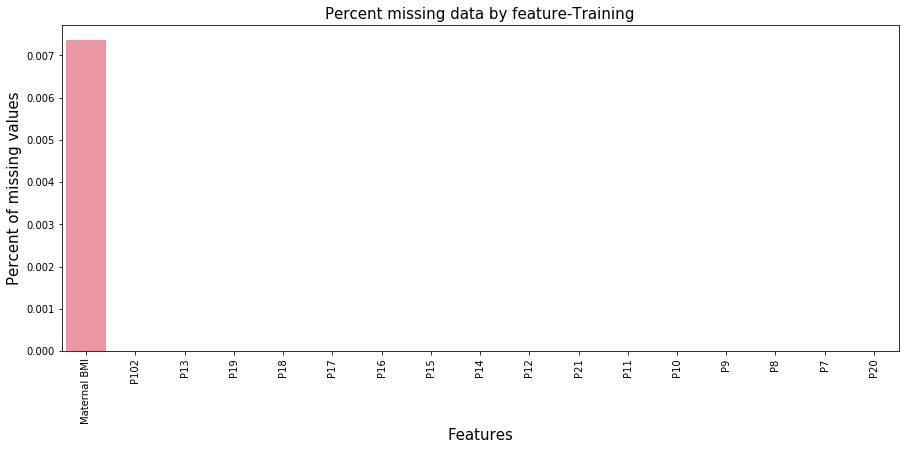

In [69]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_training.index, y=missing_data_training['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature-Training', fontsize=15)
missing_data_training.head()

- __Production__: the top 3 variables with most null values:

,Total,Percent
Maternal BMI,2,0.013333
History of cervical surgery,1,0.006667
Polyhydramnios,1,0.006667
Uterine Malformation,1,0.006667
P102,0,0.000000


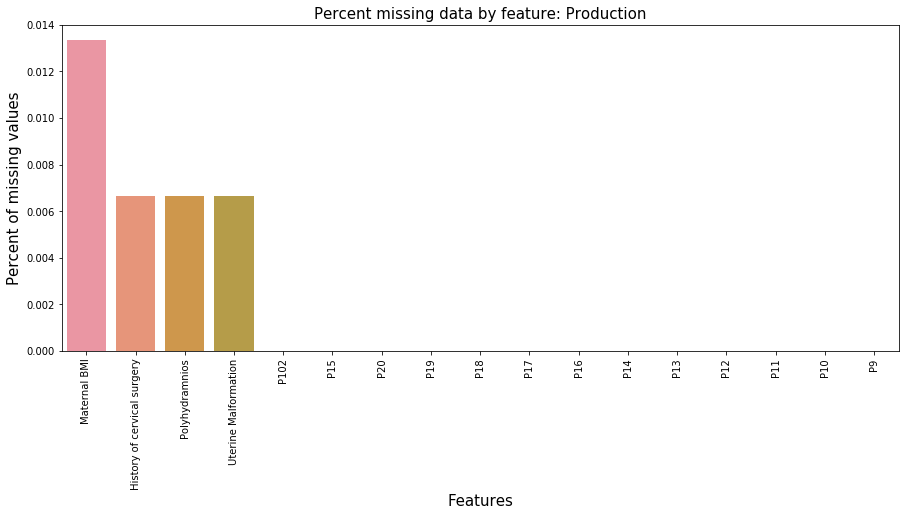

In [70]:
total_null_prod = pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data_prod.index, y=missing_data_prod['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature: Production', fontsize=15)
missing_data_prod.head()

#### Note:
- the top 17 features with highest & missing data.

--------------------------------------------
### <font color='red'>Session 1: Exploration Conclusion: </font>
- __Different columns in T & P:__   
  <font color='red'> Gestational Category at Delivery</font> is missed in production, to be predicted.__  
  
- __Difference top variables with null values in T & P:__  
    - Training top 3 features: <font color='red'>'Microbiology Notes', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>;  
    - Production top 3 features: <font color='red'>'Cervical Sludge', 'Cervical Blackline Appearance', 'Cervical Beaking'</font>.  
- __Lots of features have great difference in description information between T & P (>30% difference):__  
    __e.g.:__  
     - Training Parity.std VS Production Parity.std: 0.309125
     - Training B2.mean VS Production B2. mean: 0.3078
-----------------------------------------------

### <font color='red'>2: Data Pre-process:</font>

#### 2.1: Fill the null values in T & P data:

In [71]:
list_top_null = list(missing_data_training.index)

for item in list_top_null:
    pd_frame_training[item].fillna(pd_frame_training[item].mode()[0], inplace=True)

#### -  No null in training data after fill in the missing values with the most common value :

In [72]:
total_null_training = pd_frame_training.isnull().sum().sort_values(ascending=False)
percent_null_training = (pd_frame_training.isnull().sum()/pd_frame_training.isnull().count()).sort_values(ascending=False)
missing_data_training = pd.concat([total_null_training[0:17], percent_null_training[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_training.head()

,Total,Percent
P102,0,0.0
P5,0,0.0
P7,0,0.0
P8,0,0.0
P9,0,0.0


#### Fill the na in prod:

In [73]:
list_top_null = list(missing_data_prod.index)

for item in list_top_null:
    pd_frame_production[item].fillna(pd_frame_production[item].mode()[0], inplace=True)

#### -  No null in production data with >60% missing percent, after fill in the missing values with the most common value.

In [74]:
total_null_prod= pd_frame_production.isnull().sum().sort_values(ascending=False)
percent_null_prod = (pd_frame_production.isnull().sum()/pd_frame_production.isnull().count()).sort_values(ascending=False)
missing_data_prod = pd.concat([total_null_prod[0:17], percent_null_prod[0:17]], axis=1, keys=['Total', 'Percent'])

missing_data_prod.head()

,Total,Percent
P102,0,0.0
P37,0,0.0
P7,0,0.0
P8,0,0.0
P9,0,0.0


#### 2.2: Encoding:

- __Training, production dataset:__ Convert string values in columns except for target into numerical.

In [75]:
from sklearn import preprocessing

In [76]:
le = preprocessing.LabelEncoder()

In [77]:
def encoding_df(df):
    for col in df:
        if col!=target and df[col].dtype=='O':
           #print(col)
            df[col]=le.fit_transform(df[col])

In [78]:
# Encode training data:
encoding_df(pd_frame_training)

In [79]:
# Encode prod data:
encoding_df(pd_frame_production)

#### 2.3: Convert to h2oframe:

#### Training data conversion:

In [80]:
frame_training = h2o.H2OFrame(pd_frame_training)
frame_production = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [82]:
print(frame_training['Gestational Category at Delivery'].types)
print(frame_training['Maternal Age at Recruitment / 1st Sample'].types)
print(frame_training['Short Cervix (< 25 mm)'].types)
#print(frame_training['Central Asian'].types) # Updated 08052019: Remove feature 'Central Asian'.

{'Gestational Category at Delivery': 'enum'}
{'Maternal Age at Recruitment / 1st Sample': 'real'}
{'Short Cervix (< 25 mm)': 'int'}


In [83]:
frame_training.head(2)

Gestational Category at Delivery,Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage?(?50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
Term,20.86,36.66,3,1,29.6,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,106.457,299.31,1.05487,3.62024,50.9865,12.1944,58.5296,31863.6,112.299,385.4,5427.87,1298.18,6230.89,315.733,1083.57,15260.8,3649.9,17518.5,3.81889,53.7842,12.8635,61.7412,184.583,44.1466,211.891,621.749,2984.22,713.732,21.0658,28.8227,0.0407417,11.5601,0.526458,0.397284,0.659151,0.781434,0.71527,0.707618,0.568351,0.830218,0.952501,0.886337,0.878685,0.701044,0.823327,0.757163,0.749511,1.08519,1.01903,1.01138,1.14131,1.13366,1.0675,0.746046,1.00791,1.1302,1.06403,1.05638,0.87874,1.00102,0.934858,0.927207,1.26289,1.19673,1.18907,1.31901,1.31136,1.24519,1.04981,1.17209,1.10593,1.09827,1.43396,1.36779,1.36014,1.49008,1.48242,1.41626,1.30478,1.23862,1.23097,1.3609,1.35325,1.28709,1.62277,1.61512,1.54895,1.67124,0.0619736,0.0390199,0.0855525,0.107282,0.0955245,0.0941649,0.0765842,0.167914,0.210562,0.187486,0.184817,0.105722,0.132574,0.118045,0.116365,0.290673,0.258818,0.255134,0.324554,0.319935,0.284873
Term,23.57,26.26,3,2,31,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1322.59,2453.53,120.71,1.39547,1778.65,69.1083,74.4008,3.245e+06,159650,1845.62,2.35242e+06,91401.7,98401.5,296166,3423.81,4.36397e+06,169559,182544,168.447,214701,8342.07,8980.93,2482.05,96.4383,103.824,122920,132333,5141.71,179.324,205.415,0.0281669,0.572515,5.06654,27.3354,2.39321,23.2689,5.25418,2.88125,27.9866,3.04449,23.9202,5.90546,3.53252,25.3133,46.189,28.1743,25.8014,21.2469,3.23214,0.859202,24.1078,21.7349,3.72017,30.1943,5.25212,26.1278,8.11309,5.74015,27.5209,48.3966,30.3819,28.009,23.4545,5.43977,3.06683,26.3155,23.9425,5.9278,28.1722,49.0479,31.0332,28.6603,24.1058,6.09104,3.71811,26.9667,24.5938,6.57908,46.3746,28.3599,25.9869,49.2356,46.8626,28.8479,24.2934,21.9205,3.90576,24.7814,6.3114,55.4727,0.409699,46.4955,6.72566,1.4871,71.8378,0.530564,60.2122,8.70981,1.92581,4.66328,529.222,76.553,16.9265,3.90861,0.565388,0.125012,64.1643,14.1873,2.05222


In [84]:
frame_production.head(2)

Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
19.71,40.19,6,1,19.5,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,298.19,261.747,0.450185,2.32042,47.7542,5.05162,146.812,78050.2,134.241,691.925,14239.8,1506.34,43778,117.834,607.361,12499.5,1322.24,38427.7,1.04462,21.4982,2.27416,66.0928,110.81,11.7219,340.666,241.236,7010.91,741.641,29.9008,19.5931,0.0192997,11.2212,0.802725,0.591445,0.806324,1.0632,0.720426,1.82696,0.398706,0.613585,0.870457,0.527687,1.63422,0.402305,0.659177,0.316408,1.42294,0.874056,0.531286,1.63782,0.788159,1.89469,1.55192,0.896438,1.11132,1.36819,1.02542,2.13195,0.900037,1.15691,0.814139,1.92067,1.37179,1.02902,2.13555,1.28589,2.39243,2.04966,0.707298,0.96417,0.621401,1.72794,1.17905,0.836279,1.94281,1.09315,2.19969,1.85692,0.967769,0.624999,1.73153,0.881872,1.98841,1.64564,1.09675,2.20329,1.86052,2.11739,0.151805,0.046644,0.153596,0.28145,0.110842,0.6616,0.0285819,0.0941184,0.172463,0.0679202,0.405406,0.0289191,0.0529914,0.0208694,0.124566,0.174498,0.0687217,0.41019,0.125926,0.751632,0.296012
18.71,21.55,2,0,25.9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,400.607,136.302,0.157675,0.21961,57.4394,8.16566,28.2188,54603.6,63.1657,87.9773,23010.6,3271.22,11304.6,21.4915,29.9333,7829.12,1113,3846.28,0.034627,9.05676,1.28752,4.44939,12.6143,1.79326,6.19712,469.031,1620.87,230.425,41.5496,15.738,0.0599085,51.7879,0.827506,0.701506,0.69789,1.34883,1.02866,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.0620285,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.04012,0.935639,0.615463,0.860329,0.856712,1.50766,1.18748,1.083,0.730712,1.38166,1.06148,0.956997,1.37804,1.05786,0.95338,1.70881,1.60432,1.28415,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.19894,1.09446,0.774286,0.742177,0.422001,0.317519,1.07294,0.968462,0.648286,1.06933,0.964845,0.644669,1.29561,0.106202,0.0219479,0.0195295,0.454805,0.240708,0.170842,0.00521296,0.00463856,0.108023,0.0571718,0.0405776,0.000958613,0.0223242,0.0118152,0.00838585,0.0198644,0.0105133,0.00746183,0.244835,0.173772,0.0919697


-------------------------------------------------------
### <font color = 'red'>Session 2 preprocess Conclusion:</font>
- __Fill the null values in T & P data:__  
    No more columns with >50% missing data values.  
- __Convert the text values to integer codes.__
-------------------------------------------------------

### <font color='red'>Session 3: Models training and generate leaderboard.</font>

- Note: As the production dataset has the different columns with training data, this session will just focus on training data. 

#### 3.1: Get independent variables on Training data:

In [85]:
from h2o.automl import H2OAutoML
import time

In [86]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x

In [87]:
#frame_training_drop_SeqNo = h2o.H2OFrame(pd_frame_training_cp)
X=get_independent_variables(frame_training, target) 
print(X)

['Gravidity', 'Parity', 'Short Cervix (< 25 mm)', 'History of cervical surgery', 'Cervical Suture', 'Transabdominal suture', 'Uterine Malformation', 'Fertility Assisted Pregnancy', 'Current Smoker', 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)', 'Cervical change seen during speculum examination', 'Maternal Pregnancy Induced Hypertension', 'Maternal PET', 'Maternal GDM', 'Antepartum Haemorrhage', 'Polyhydramnios', 'Placenta Previa ', 'Gestational Age at Collection', 'Maternal Age at Recruitment / 1st Sample', 'Maternal BMI', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 

#### 3.2: Get the best models with parameters:

In [88]:
#Set the run time for auto training limitation.
run_time=1500

In [89]:
aml = H2OAutoML(max_runtime_secs=run_time)

In [90]:
model_start_time = time.time()
aml.train(x=X,y=target,training_frame=frame_training, )

AutoML progress: |████████████████████████████████████████████████████████| 100%


#### 3.3: Retrive the learderboard of the best models:

- The best models are trained by h2o. Shown as the table below:

In [92]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_20190805_162859_model_8,0.830981,0.622891,0.458333,0.332376,0.110474
DeepLearning_grid_1_AutoML_20190805_162859_model_6,0.8125,0.504074,0.5,0.317288,0.100671
DeepLearning_grid_1_AutoML_20190805_162859_model_21,0.794355,1.17665,0.5,0.34344,0.117951
DeepLearning_grid_1_AutoML_20190805_162859_model_3,0.789987,0.723188,0.5,0.297691,0.08862
DeepLearning_grid_1_AutoML_20190805_162859_model_4,0.772177,0.487141,0.5,0.300844,0.0905069
DeepLearning_grid_1_AutoML_20190805_162859_model_9,0.757392,0.666763,0.5,0.310184,0.0962142
DeepLearning_grid_1_AutoML_20190805_162859_model_20,0.725806,1.85224,0.5,0.382241,0.146108
DeepLearning_grid_1_AutoML_20190805_162859_model_5,0.72547,1.28949,0.5,0.371236,0.137816
DeepLearning_grid_1_AutoML_20190805_162859_model_16,0.720094,1.16474,0.5,0.354623,0.125758
DeepLearning_grid_1_AutoML_20190805_162859_model_7,0.719422,1.122,0.5,0.399491,0.159593


#### 3.4: Get the best algorithm of model:

In [93]:
best_model_1 = h2o.get_model(aml.leaderboard[0,'model_id'])
print('The algorithm of best model: ', best_model_1.model_id)

The algorithm of best model:  DeepLearning_grid_1_AutoML_20190805_162859_model_8


The <font color='red'> {{best_model_1.model_id}} </font> should be the best model to fit training data.

#### 3.5: Get the parameters of this best deeplearning model:

In [94]:
best_model_1.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DeepLearning_grid_1_AutoML_20190805_162859_model_8',
   'type': 'Key<Model>',
   'URL': '/3/Models/DeepLearning_grid_1_AutoML_20190805_162859_model_8'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'automl_training_Key_Frame__upload_8864b83cfa68ea8ba1c80cef7349492f.hex',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/automl_training_Key_Frame__upload_8864b83cfa68ea8ba1c80cef7349492f.hex'}},
 'validation_frame': {'default': None, 'actual': None},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': True, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': True},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'fold_assignment'

- Check the details of this best model:

In [95]:
best_model_1

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190805_162859_model_8


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 5.312159780834026e-09
RMSE: 7.288456476397472e-05
LogLoss: 8.194124257783582e-06
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.08064516129032262
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999763906439429: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9997639,1.0,8.0
max f2,0.9997639,1.0,8.0
max f0point5,0.9997639,1.0,8.0
max accuracy,0.9997639,1.0,8.0
max precision,1.0000000,1.0,0.0
max recall,0.9997639,1.0,8.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9997639,1.0,8.0
max min_per_class_accuracy,0.9997639,1.0,8.0
max mean_per_class_accuracy,0.9997639,1.0,8.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.18 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.4632353,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.5080645,0.5080645,9.6774194,9.6774194
,2,0.5,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0403226,0.5483871,9.6774194,9.6774194
,3,0.6029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.6612903,9.6774194,9.6774194
,4,0.6985294,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.7661290,9.6774194,9.6774194
,5,0.8014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.8790323,9.6774194,9.6774194
,6,0.8970588,0.9999958,1.0967742,1.0967742,1.0,0.9999998,1.0,1.0000000,0.1048387,0.9838710,9.6774194,9.6774194
,7,1.0,0.0000000,0.1566820,1.0,0.1428571,0.1429018,0.9117647,0.9117693,0.0161290,1.0,-84.3317972,0.0




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.11047366464667582
RMSE: 0.3323757882979382
LogLoss: 0.6228908126938658
Mean Per-Class Error: 0.17069892473118276
AUC: 0.830981182795699
pr_auc: 0.48983251218029505
Gini: 0.661962365591398
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.008027899182686834: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),1.0,11.0,0.9167,(11.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,1.0,135.0,0.0809,(11.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0080279,0.9575290,71.0
max f2,0.0080279,0.9825674,71.0
max f0point5,0.9766207,0.9396552,50.0
max accuracy,0.0080279,0.9191176,71.0
max precision,1.0000000,1.0,0.0
max recall,0.0080279,1.0,71.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9998971,0.4017435,29.0
max min_per_class_accuracy,0.9998137,0.7580645,32.0
max mean_per_class_accuracy,0.9998971,0.8293011,29.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 93.06 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0808824,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.0887097,0.0887097,9.6774194,9.6774194
,2,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0241935,0.1129032,9.6774194,9.6774194
,3,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,4,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,5,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,6,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194
,7,0.5,0.9999996,1.0124069,1.0806452,0.9230769,0.9999999,0.9852941,1.0000000,0.0967742,0.5403226,1.2406948,8.0645161
,8,0.6029412,0.9999862,1.0967742,1.0833989,1.0,0.9999965,0.9878049,0.9999994,0.1129032,0.6532258,9.6774194,8.3398899
,9,0.6985294,0.9998206,1.0124069,1.0736842,0.9230769,0.9999330,0.9789474,0.9999903,0.0967742,0.75,1.2406948,7.3684211
,10,0.8014706,0.9950795,0.8617512,1.0464635,0.7857143,0.9982711,0.9541284,0.9997695,0.0887097,0.8387097,-13.8248848,4.6463451



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.926455,0.0286985,0.9285714,1.0,0.8888889,0.8888889,0.9259259
auc,0.8016592,0.0860274,0.8076923,1.0,0.8478261,0.6527778,0.7
err,0.0735450,0.0286985,0.0714286,0.0,0.1111111,0.1111111,0.0740741
err_count,2.0,0.7745967,2.0,0.0,3.0,3.0,2.0
f0point5,0.9392963,0.0239718,0.942029,1.0,0.9055118,0.9090909,0.9398496
f1,0.9608907,0.0155306,0.962963,1.0,0.9387755,0.9411765,0.9615384
f2,0.9838573,0.0064489,0.9848485,1.0,0.9745763,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.6233620,0.2535355,0.5592886,0.0520972,0.7703083,1.1603864,0.5747291
max_per_class_error,0.75,0.2738613,1.0,0.0,0.75,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-05 16:33:47,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-05 16:33:47,4 min 12.585 sec,9315 obs/sec,10.0,1,1360.0,0.2422004,0.4728096,0.2708369,0.9025538,0.7304518,1.0967742,0.0588235
,2019-08-05 16:33:52,4 min 17.650 sec,10209 obs/sec,390.0,39,53040.0,0.0000729,0.0000082,0.9999999,1.0,0.0806452,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Have any previous pregnancies had an antepartum haemorrhage?(?50ml),1.0,1.0,0.0150115
Maternal BMI,0.9489304,0.9489304,0.0142449
Antepartum Haemorrhage,0.8560274,0.8560274,0.0128503
Maternal GDM,0.8036579,0.8036579,0.0120641
Uterine Malformation,0.7526826,0.7526826,0.0112989
---,---,---,---
P68,0.4125342,0.4125342,0.0061928
P64,0.4004091,0.4004091,0.0060107
P34,0.3962757,0.3962757,0.0059487
P78,0.3927668,0.3927668,0.0058960



See the whole table with table.as_data_frame()


In [96]:
best_model_2 = h2o.get_model(aml.leaderboard[1,'model_id'])
print('The algorithm of best model: ', best_model_2.algo)

The algorithm of best model:  deeplearning


In [97]:
best_model_2

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190805_162859_model_6


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 3.1925373150778285e-09
RMSE: 5.650254255409953e-05
LogLoss: 1.0097382767132323e-05
Mean Per-Class Error: 0.0
AUC: 1.0
pr_auc: 0.12903225806451613
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9995165934575375: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),12.0,0.0,0.0,(0.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,12.0,124.0,0.0,(0.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9995166,1.0,14.0
max f2,0.9995166,1.0,14.0
max f0point5,0.9995166,1.0,14.0
max accuracy,0.9995166,1.0,14.0
max precision,1.0000000,1.0,0.0
max recall,0.9995166,1.0,14.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9995166,1.0,14.0
max min_per_class_accuracy,0.9995166,1.0,14.0
max mean_per_class_accuracy,0.9995166,1.0,14.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 91.18 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.4044118,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.4435484,0.4435484,9.6774194,9.6774194
,2,0.5,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.5483871,9.6774194,9.6774194
,3,0.6029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.6612903,9.6774194,9.6774194
,4,0.6985294,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.7661290,9.6774194,9.6774194
,5,0.8014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.8790323,9.6774194,9.6774194
,6,0.8970588,0.9998343,1.0967742,1.0967742,1.0,0.9999926,1.0,0.9999992,0.1048387,0.9838710,9.6774194,9.6774194
,7,1.0,0.0000000,0.1566820,1.0,0.1428571,0.1428401,0.9117647,0.9117622,0.0161290,1.0,-84.3317972,0.0




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.1006714029596559
RMSE: 0.31728757139172015
LogLoss: 0.5040738753334608
Mean Per-Class Error: 0.20295698924731187
AUC: 0.8125
pr_auc: 0.616994042055372
Gini: 0.625
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0005137713054450992: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0005138,0.9538462,84.0
max f2,0.0005138,0.9810127,84.0
max f0point5,0.1437777,0.9355828,80.0
max accuracy,0.1437777,0.9117647,80.0
max precision,1.0000000,1.0,0.0
max recall,0.0005138,1.0,84.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.9943993,0.3605492,43.0
max min_per_class_accuracy,0.9943993,0.75,43.0
max mean_per_class_accuracy,0.9993188,0.7970430,33.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 92.01 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0882353,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.0967742,0.0967742,9.6774194,9.6774194
,2,0.1029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0161290,0.1129032,9.6774194,9.6774194
,3,0.1544118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.1693548,9.6774194,9.6774194
,4,0.2058824,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0564516,0.2258065,9.6774194,9.6774194
,5,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1048387,0.3306452,9.6774194,9.6774194
,6,0.4044118,0.9999995,1.0967742,1.0967742,1.0,0.9999999,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194
,7,0.5,0.9999974,1.0124069,1.0806452,0.9230769,0.9999990,0.9852941,0.9999998,0.0967742,0.5403226,1.2406948,8.0645161
,8,0.6029412,0.9998371,1.0967742,1.0833989,1.0,0.9999433,0.9878049,0.9999901,0.1129032,0.6532258,9.6774194,8.3398899
,9,0.6985294,0.9943332,1.0124069,1.0736842,0.9230769,0.9976503,0.9789474,0.9996699,0.0967742,0.75,1.2406948,7.3684211
,10,0.8014706,0.9539280,0.7050691,1.0263392,0.6428571,0.9745612,0.9357798,0.9964450,0.0725806,0.8225806,-29.4930876,2.6339154



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.926455,0.0286985,0.9285714,1.0,0.8888889,0.8888889,0.9259259
auc,0.8029714,0.0932200,0.8846154,1.0,0.7391304,0.6111111,0.78
err,0.0735450,0.0286985,0.0714286,0.0,0.1111111,0.1111111,0.0740741
err_count,2.0,0.7745967,2.0,0.0,3.0,3.0,2.0
f0point5,0.9392963,0.0239718,0.942029,1.0,0.9055118,0.9090909,0.9398496
f1,0.9608907,0.0155306,0.962963,1.0,0.9387755,0.9411765,0.9615384
f2,0.9838573,0.0064489,0.9848485,1.0,0.9745763,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,0.5060344,0.3372308,0.2394054,0.0014427,0.6320551,1.3706304,0.2866383
max_per_class_error,0.75,0.2738613,1.0,0.0,0.75,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-05 16:32:43,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-05 16:32:43,3 min 9.033 sec,34871 obs/sec,10.0,1,1360.0,0.2567368,0.3682779,0.1806848,0.9146505,0.8217493,1.0967742,0.0735294
,2019-08-05 16:32:48,3 min 14.053 sec,45288 obs/sec,1680.0,168,228480.0,0.0000565,0.0000101,1.0000000,1.0,0.1290323,1.0967742,0.0


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
B5,1.0,1.0,0.0200516
Have any previous pregnancies had an antepartum haemorrhage?(?50ml),0.9486827,0.9486827,0.0190227
Maternal BMI,0.8809980,0.8809980,0.0176655
Maternal Pregnancy Induced Hypertension,0.8191965,0.8191965,0.0164262
Antepartum Haemorrhage,0.8112637,0.8112637,0.0162672
---,---,---,---
P30,0.1907504,0.1907504,0.0038249
P71,0.1889544,0.1889544,0.0037888
P61,0.1821286,0.1821286,0.0036520
P50,0.1756493,0.1756493,0.0035221



See the whole table with table.as_data_frame()


In [98]:
best_model_3 = h2o.get_model(aml.leaderboard[2,'model_id'])
print('The algorithm of best model: ', best_model_3.algo)

The algorithm of best model:  deeplearning


In [99]:
best_model_3

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_20190805_162859_model_21


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.05697467876822951
RMSE: 0.2386936923511585
LogLoss: 0.3058545583357953
Mean Per-Class Error: 0.07795698924731187
AUC: 0.9771505376344086
pr_auc: 0.27185195761604963
Gini: 0.9543010752688172
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0003719055235606908: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),8.0,4.0,0.3333,(4.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,8.0,128.0,0.0294,(4.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0003719,0.9841270,38.0
max f2,0.0003719,0.9935897,38.0
max f0point5,0.0048026,0.9838710,34.0
max accuracy,0.0048026,0.9705882,34.0
max precision,1.0000000,1.0,0.0
max recall,0.0003719,1.0,38.0
max specificity,1.0000000,1.0,0.0
max absolute_mcc,0.0048026,0.8172043,34.0
max min_per_class_accuracy,0.9722420,0.9166667,25.0
max mean_per_class_accuracy,0.9190459,0.9220430,26.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 87.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.4338235,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.4758065,0.4758065,9.6774194,9.6774194
,2,0.5,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.0725806,0.5483871,9.6774194,9.6774194
,3,0.6029412,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.6612903,9.6774194,9.6774194
,4,0.6985294,0.9999980,1.0967742,1.0967742,1.0,0.9999998,1.0,1.0000000,0.1048387,0.7661290,9.6774194,9.6774194
,5,0.8014706,0.9980994,1.0184332,1.0867120,0.9285714,0.9997322,0.9908257,0.9999656,0.1048387,0.8709677,1.8433180,8.6712045
,6,0.8970588,0.0768374,1.0124069,1.0787943,0.9230769,0.7322698,0.9836066,0.9714406,0.0967742,0.9677419,1.2406948,7.8794289
,7,1.0,0.0000000,0.3133641,1.0,0.2857143,0.0050796,0.9117647,0.8719623,0.0322581,1.0,-68.6635945,0.0




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.11795113113354432
RMSE: 0.3434401419949979
LogLoss: 1.1766525484316068
Mean Per-Class Error: 0.1841397849462365
AUC: 0.7943548387096775
pr_auc: 0.2675368119483447
Gini: 0.588709677419355
Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.2755625663629454e-08: 


,Preterm (?20 weeks < 37 weeks),Term,Error,Rate
Preterm (?20 weeks < 37 weeks),0.0,12.0,1.0,(12.0/12.0)
Term,0.0,124.0,0.0,(0.0/124.0)
Total,0.0,136.0,0.0882,(12.0/136.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.0000000,0.9538462,45.0
max f2,0.0000000,0.9810127,45.0
max f0point5,0.9999289,0.9375000,14.0
max accuracy,0.0000000,0.9117647,45.0
max precision,0.9999847,0.9801980,10.0
max recall,0.0000000,1.0,45.0
max specificity,1.0000000,0.8333333,0.0
max absolute_mcc,0.9999847,0.4098564,10.0
max min_per_class_accuracy,0.9999847,0.7983871,10.0
max mean_per_class_accuracy,0.9999847,0.8158602,10.0


Gains/Lift Table: Avg response rate: 91.18 %, avg score: 90.80 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.2352941,1.0,1.0967742,1.0967742,1.0,1.0,1.0,1.0,0.2580645,0.2580645,9.6774194,9.6774194
,2,0.3014706,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0,0.0725806,0.3306452,9.6774194,9.6774194
,3,0.4044118,1.0000000,1.0967742,1.0967742,1.0,1.0000000,1.0,1.0000000,0.1129032,0.4435484,9.6774194,9.6774194
,4,0.5,1.0000000,1.0124069,1.0806452,0.9230769,1.0000000,0.9852941,1.0000000,0.0967742,0.5403226,1.2406948,8.0645161
,5,0.6029412,1.0000000,1.0184332,1.0700236,0.9285714,1.0000000,0.9756098,1.0000000,0.1048387,0.6451613,1.8433180,7.0023603
,6,0.6985294,0.9999987,1.0967742,1.0736842,1.0,0.9999998,0.9789474,1.0000000,0.1048387,0.75,9.6774194,7.3684211
,7,0.8014706,0.9992744,0.7834101,1.0364013,0.7142857,0.9998534,0.9449541,0.9999812,0.0806452,0.8306452,-21.6589862,3.6401302
,8,0.8970588,0.6304012,0.8436725,1.0158646,0.7692308,0.9443531,0.9262295,0.9940536,0.0806452,0.9112903,-15.6327543,1.5864622
,9,1.0,0.0000000,0.8617512,1.0,0.7857143,0.1577339,0.9117647,0.9079618,0.0887097,1.0,-13.8248848,0.0



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9190476,0.0197121,0.9285714,0.962963,0.8888889,0.8888889,0.9259259
auc,0.8022456,0.0478357,0.9230769,0.8076923,0.8043478,0.7361111,0.74
err,0.0809524,0.0197121,0.0714286,0.0370370,0.1111111,0.1111111,0.0740741
err_count,2.2,0.5291503,2.0,1.0,3.0,3.0,2.0
f0point5,0.9370977,0.0143898,0.942029,0.9701493,0.9243697,0.9090909,0.9398496
f1,0.956596,0.0114977,0.962963,0.9811321,0.9361702,0.9411765,0.9615384
f2,0.9770705,0.0108503,0.9848485,0.9923664,0.9482759,0.9756098,0.984252
lift_top_group,1.0988595,0.0328651,1.0769231,1.0384616,1.173913,1.125,1.08
logloss,1.4346843,0.3940470,0.6824062,0.9070458,2.177352,1.6241506,1.7824667
max_per_class_error,0.9,0.1414214,1.0,1.0,0.5,1.0,1.0


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
,2019-08-05 16:45:30,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan
,2019-08-05 16:45:33,5 min 4.843 sec,432 obs/sec,9.1544118,1,1245.0,0.2783043,0.8099230,0.0372474,0.8907930,0.2421419,1.0967742,0.0735294
,2019-08-05 16:45:39,5 min 11.382 sec,552 obs/sec,37.0294118,4,5036.0,0.2358982,0.2800015,0.3082898,0.9670699,0.4001126,1.0967742,0.0588235
,2019-08-05 16:45:45,5 min 16.972 sec,613 obs/sec,64.9779412,7,8837.0,0.2372916,0.5077071,0.3000941,0.9217070,0.2450919,1.0967742,0.0441176
,2019-08-05 16:45:50,5 min 22.172 sec,653 obs/sec,92.875,10,12631.0,0.2386937,0.3058546,0.2917986,0.9771505,0.2718520,1.0967742,0.0294118


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
Have any previous pregnancies had an antepartum haemorrhage?(?50ml),1.0,1.0,0.0096469
Maternal BMI,0.9564779,0.9564779,0.0092271
Gestational Age at Collection,0.9062325,0.9062325,0.0087424
P12,0.9040818,0.9040818,0.0087216
Maternal Age at Recruitment / 1st Sample,0.9017537,0.9017537,0.0086992
---,---,---,---
P92,0.7403824,0.7403824,0.0071424
P22,0.7395408,0.7395408,0.0071343
P35,0.7368914,0.7368914,0.0071087
P55,0.7366123,0.7366123,0.0071060



See the whole table with table.as_data_frame()


In [100]:
# AUC of cross-validated holdout predictions based on training data:
print('best_model_1 AUC:', best_model_1.auc(), 'best_model_1 Cross validate AUC: ', best_model_1.auc(xval=True))
print('best_model_2 AUC:', best_model_2.auc(), 'best_model_2 Cross validate AUC: ', best_model_2.auc(xval=True))
print('best_model_3 AUC:', best_model_3.auc(), 'best_model_3 Cross validate AUC: ', best_model_3.auc(xval=True))

best_model_1 AUC: 1.0 best_model_1 Cross validate AUC:  0.830981182795699
best_model_2 AUC: 1.0 best_model_2 Cross validate AUC:  0.8125
best_model_3 AUC: 0.9771505376344086 best_model_3 Cross validate AUC:  0.7943548387096775


### <font color='red'>Session 3 Model Training Conclusions:</font>  
- The best model is:   
   <font color='red'>1. {{best_model_1.model_id}}</font>: AUC on training data: {{best_model_1.auc()}}, Cross-validate AUC: {{best_model_1.auc(xval=True)}}   
   <font color='red'>2. {{best_model_2.model_id}}</font> : AUC on training data:  {{best_model_2.auc()}}, Cross-validate AUC: {{best_model_2.auc(xval=True)}}  
   <font color='red'>3. {{best_model_3.model_id}}</font>: AUC on training data:  {{best_model_3.auc()}}, Cross-validate AUC: {{best_model_3.auc(xval=True)}} 

----------------------------------------------------------

### <font color='red'>Session 4: Interpretability </font>

#### 4.1: Retrive the variable importance of training dataset based on the best model.

- The top important variables filter by the threshold of 'relative importance' 0.7 (importance >0.7).

In [101]:
matrix_VI_1=best_model_1.varimp(True)
matrix_VI_1.iloc[0:10]
#matrix_VI[matrix_VI['relative_importance']>0.70]

,variable,relative_importance,scaled_importance,percentage
0,Have any previous pregnancies had an antepartu...,1.000000,1.000000,0.015012
1,Maternal BMI,0.948930,0.948930,0.014245
2,Antepartum Haemorrhage,0.856027,0.856027,0.012850
3,Maternal GDM,0.803658,0.803658,0.012064
4,Uterine Malformation,0.752683,0.752683,0.011299
5,Maternal Age at Recruitment / 1st Sample,0.745755,0.745755,0.011195
6,B7,0.734215,0.734215,0.011022
7,Cervical change seen during speculum examination,0.713991,0.713991,0.010718
8,B6,0.713308,0.713308,0.010708
9,P13,0.690910,0.690910,0.010372


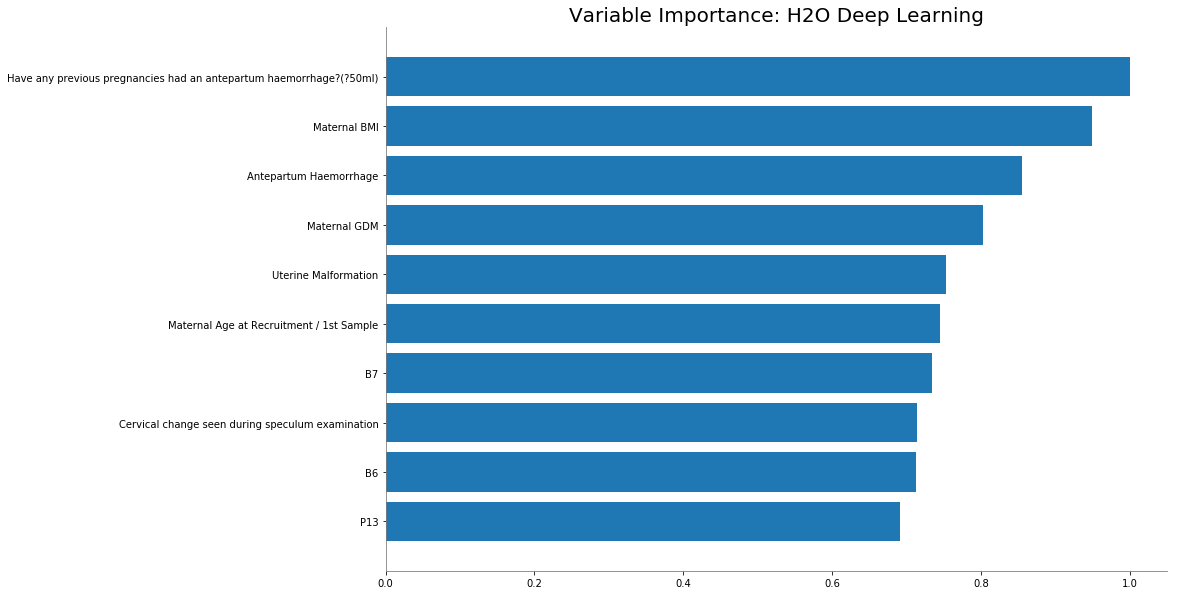

In [102]:
best_model_1.varimp_plot(10)

#### 4.2 Retrive the most important variables based on the 2nd best model:

In [103]:
matrix_VI_2=best_model_2.varimp(True)
matrix_VI_2.iloc[0:10]

,variable,relative_importance,scaled_importance,percentage
0,B5,1.000000,1.000000,0.020052
1,Have any previous pregnancies had an antepartu...,0.948683,0.948683,0.019023
2,Maternal BMI,0.880998,0.880998,0.017665
3,Maternal Pregnancy Induced Hypertension,0.819197,0.819197,0.016426
4,Antepartum Haemorrhage,0.811264,0.811264,0.016267
5,Placenta Previa,0.800536,0.800536,0.016052
6,Uterine Malformation,0.769847,0.769847,0.015437
7,Maternal PET,0.764711,0.764711,0.015334
8,Maternal GDM,0.710848,0.710848,0.014254
9,Maternal Age at Recruitment / 1st Sample,0.696086,0.696086,0.013958


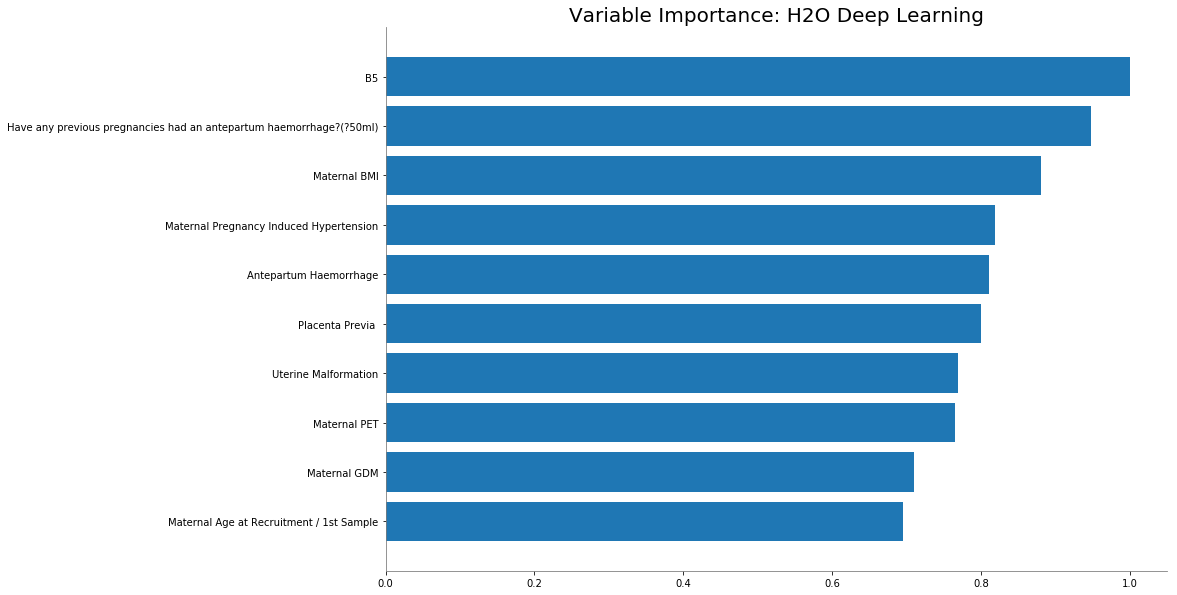

In [104]:
best_model_2.varimp_plot(10)

#### 4.3 Retrive the important variables based on 3rd best model:

- The top 10 most important variables based on model3：

In [105]:
matrix_VI_3=best_model_3.varimp(True)
matrix_VI_3.iloc[0:10]
#matrix_VI_3[matrix_VI['relative_importance']>1.0]

,variable,relative_importance,scaled_importance,percentage
0,Have any previous pregnancies had an antepartu...,1.000000,1.000000,0.009647
1,Maternal BMI,0.956478,0.956478,0.009227
2,Gestational Age at Collection,0.906232,0.906232,0.008742
3,P12,0.904082,0.904082,0.008722
4,Maternal Age at Recruitment / 1st Sample,0.901754,0.901754,0.008699
5,Maternal GDM,0.896184,0.896184,0.008645
6,Uterine Malformation,0.893304,0.893304,0.008618
7,B6,0.893289,0.893289,0.008618
8,Cervical change seen during speculum examination,0.887295,0.887295,0.008560
9,P16,0.871522,0.871522,0.008408


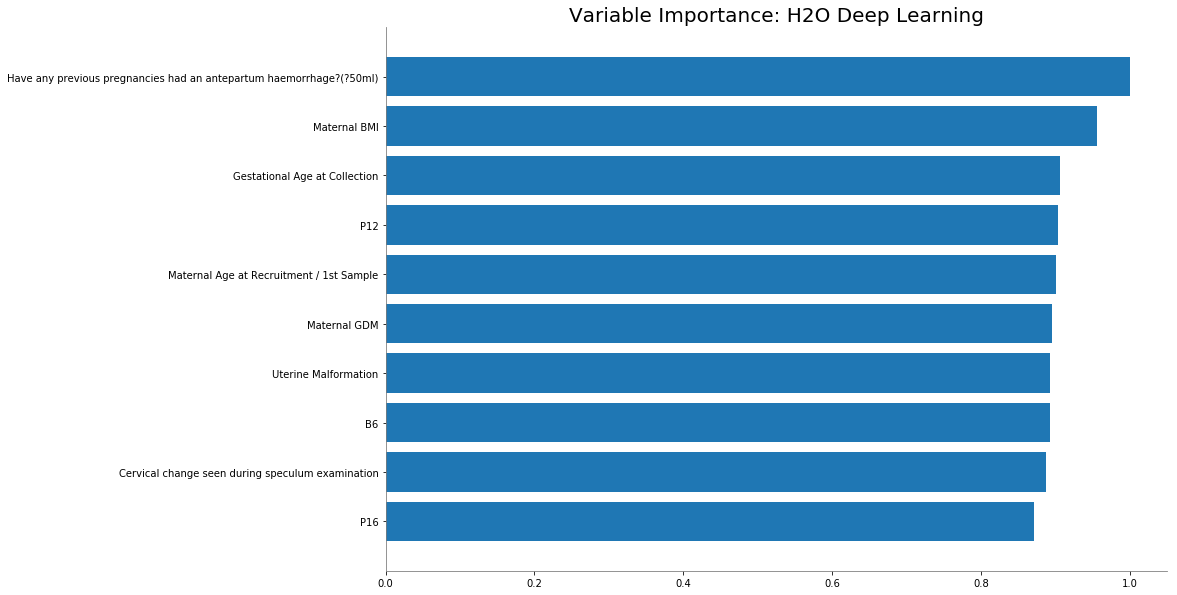

In [106]:
best_model_3.varimp_plot(10)

### <font color='red'> Session 4 Variable importance Conclusion: </font>  
- The most 5 important variables in:
    - Top 1 model- __DeepLearning_1__:  
        - <font color='red'>{{matrix_VI_1['variable'][0]}} </font>  
        - <font color='red'>{{matrix_VI_1['variable'][1]}}  </font>  
        - <font color='red'>{{matrix_VI_1['variable'][2]}}   </font>
        - <font color='red'>{{matrix_VI_1['variable'][3]}}   </font>
        - <font color='red'>{{matrix_VI_1['variable'][4]}}   </font>
        
    - Top 2 model - __GBM_1__:
        - <font color='red'>{{matrix_VI_2['variable'][0]}} </font>  
        - <font color='red'>{{matrix_VI_2['variable'][1]}}</font>  
        - <font color='red'>{{matrix_VI_2['variable'][2]}}</font>
        - <font color='red'>{{matrix_VI_2['variable'][3]}}   </font>
        - <font color='red'>{{matrix_VI_2['variable'][4]}}   </font>
        
    - Top 3 model -__DeepLearning_2__:
        - <font color='red'>{{matrix_VI_3['variable'][0]}}</font>  
        - <font color='red'>{{matrix_VI_3['variable'][1]}}</font>  
        - <font color='red'>{{matrix_VI_3['variable'][2]}}</font>
        - <font color='red'>{{matrix_VI_3['variable'][3]}}   </font>
        - <font color='red'>{{matrix_VI_3['variable'][4]}}   </font>
 
------------------------------------------

### <font color='red'>**(Optional) Session 5 'Partial dependence plot' on some top important features. </font>

#### The PDP plot shows:
    - whether the relationship between the target and a feature(cervical_beaking here) is linear, monotonic or more complex.
    - how this feature(cervical_beaking here) influences the prediction on average.  

#### 5.1: Retrive the PDP of top 1 important variable.

In [107]:
variable_top1 = [(matrix_VI_1.iloc[:,0])[0]]
print('The most important variable: ', variable_top1)

The most important variable:  ['Have any previous pregnancies had an antepartum haemorrhage?(?50ml)']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


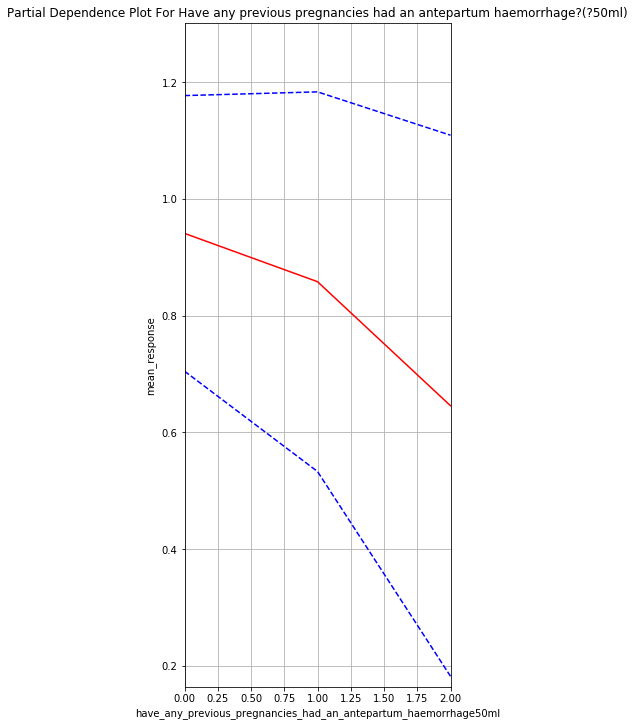

In [108]:
pdp_helpfulness = best_model_1.partial_plot(frame_training, cols = variable_top1)

##### How does {{variable_top1}} influence the response/target?
    - 1. Positive linear correlation when {{variable_top1}} in the range of 23-26;
    - 2. will not influence target too much before and after this range.

#### 5.2: Retrive the PDP: the most important variable in 2nd best model.

In [109]:
variable_top2 = [(matrix_VI_2.iloc[:,0])[0]]
print('The most important variable: ', variable_top2)

The most important variable:  ['B5']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


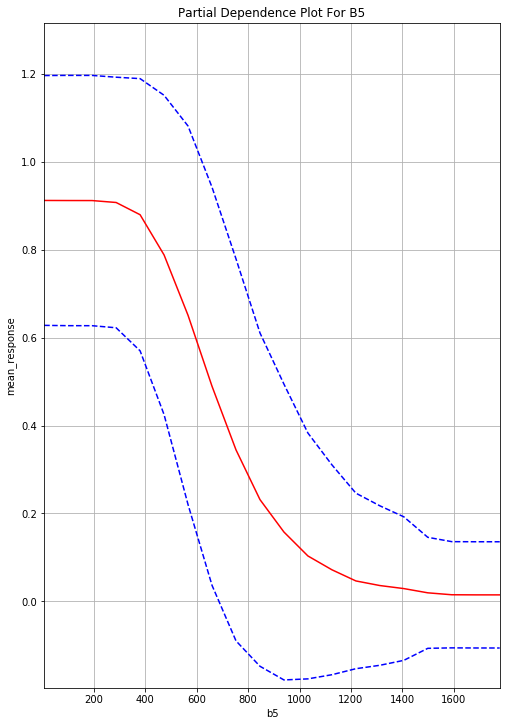

In [110]:
pdp_helpfulness_2 = best_model_2.partial_plot(frame_training, cols = variable_top2)

##### How {{variable_top2}} influence the target/response?
    - Sharply increase after {{variable_top2}} reaches 35.
    - No more influence before 35.

#### 5.3: Retrive the PDP: the most important variable in 3rd best model.

In [111]:
variable_top3 = [(matrix_VI_3.iloc[:,0])[0]]
print('The most important variable: ', variable_top3)

The most important variable:  ['Have any previous pregnancies had an antepartum haemorrhage?(?50ml)']


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


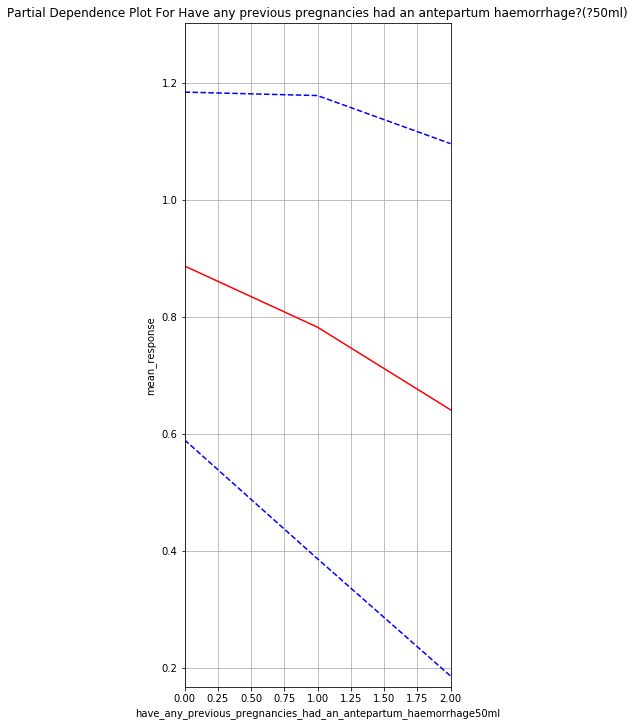

In [112]:
pdp_helpfulness_3 = best_model_3.partial_plot(frame_training, cols = variable_top3)

##### How {{variable_top3}} influence target/response?
    - Slightly negative correlation between the {{variable_top3}} and the target.

### <font color='red'>Session 5: Partial dependence plot Conclusion:</font>
  - For 1st best model-__{{best_model_1.model_id}}__ :   
       The most important variable <font color='red'>__'{{variable_top1}}'__</font>   is <font color='red'>  
    - 1. Positive linear correlation when {{variable_top1}} in the range of 23-26;  
    - 2. will not influence target too much before and after this range.  </font>.
   - For 2nd best model-__{{best_model_2.model_id}}__:  
       The most important variable <font color='red'>__'{{variable_top2}}'__</font> is <font color='red'>
      - Sharply increase after {{variable_top2}} reaches 35.  
      - No more influence before 35.  </font>.
   - For 3rd best model-__{{best_model_3.model_id}}__:  
       The most important variable <font color='red'>__'{{variable_top3}}'__</font> is <font color='red'>  
      - Slightly negative correlation between the {{variable_top3}} and the target.</font>.
------------------------------------------

### <font color='red'> Session 6: Predict Term on Production data:</font>
- Based on the picked best model & parameters: __'DeepLearning_grid_1_AutoML_20190801_170811_model_10'__

- Predict the term/pre-term based on __production data__; (Even though current(Jul.26 2019) production data missed 'Gestational Category at Delivery' column.)

#### 6.0: Convert to h2o frame: 

In [113]:
frame_production_preprocessed = h2o.H2OFrame(pd_frame_production)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [114]:
frame_production_preprocessed.head(3)

Gestational Age at Collection,Maternal Age at Recruitment / 1st Sample,Gravidity,Parity,Maternal BMI,Short Cervix (< 25 mm),History of cervical surgery,Cervical Suture,Transabdominal suture,Uterine Malformation,Fertility Assisted Pregnancy,Current Smoker,Have any previous pregnancies had an antepartum haemorrhage? (? 50ml),Cervical change seen during speculum examination,Maternal Pregnancy Induced Hypertension,Maternal PET,Maternal GDM,Antepartum Haemorrhage,Polyhydramnios,Placenta Previa,B1,B2,B3,B4,B5,B6,B7,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102
19.71,40.19,6,1,19.5,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,298.19,261.747,0.450185,2.32042,47.7542,5.05162,146.812,78050.2,134.241,691.925,14239.8,1506.34,43778,117.834,607.361,12499.5,1322.24,38427.7,1.04462,21.4982,2.27416,66.0928,110.81,11.7219,340.666,241.236,7010.91,741.641,29.9008,19.5931,0.0192997,11.2212,0.802725,0.591445,0.806324,1.0632,0.720426,1.82696,0.398706,0.613585,0.870457,0.527687,1.63422,0.402305,0.659177,0.316408,1.42294,0.874056,0.531286,1.63782,0.788159,1.89469,1.55192,0.896438,1.11132,1.36819,1.02542,2.13195,0.900037,1.15691,0.814139,1.92067,1.37179,1.02902,2.13555,1.28589,2.39243,2.04966,0.707298,0.96417,0.621401,1.72794,1.17905,0.836279,1.94281,1.09315,2.19969,1.85692,0.967769,0.624999,1.73153,0.881872,1.98841,1.64564,1.09675,2.20329,1.86052,2.11739,0.151805,0.046644,0.153596,0.28145,0.110842,0.6616,0.0285819,0.0941184,0.172463,0.0679202,0.405406,0.0289191,0.0529914,0.0208694,0.124566,0.174498,0.0687217,0.41019,0.125926,0.751632,0.296012
18.71,21.55,2,0,25.9,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,400.607,136.302,0.157675,0.21961,57.4394,8.16566,28.2188,54603.6,63.1657,87.9773,23010.6,3271.22,11304.6,21.4915,29.9333,7829.12,1113,3846.28,0.034627,9.05676,1.28752,4.44939,12.6143,1.79326,6.19712,469.031,1620.87,230.425,41.5496,15.738,0.0599085,51.7879,0.827506,0.701506,0.69789,1.34883,1.02866,0.924174,0.191645,0.188028,0.838971,0.518795,0.414313,0.0620285,0.712972,0.392795,0.288313,0.709355,0.389179,0.284696,1.04012,0.935639,0.615463,0.860329,0.856712,1.50766,1.18748,1.083,0.730712,1.38166,1.06148,0.956997,1.37804,1.05786,0.95338,1.70881,1.60432,1.28415,0.220851,0.871794,0.551618,0.447136,0.868177,0.548001,0.443519,1.19894,1.09446,0.774286,0.742177,0.422001,0.317519,1.07294,0.968462,0.648286,1.06933,0.964845,0.644669,1.29561,0.106202,0.0219479,0.0195295,0.454805,0.240708,0.170842,0.00521296,0.00463856,0.108023,0.0571718,0.0405776,0.000958613,0.0223242,0.0118152,0.00838585,0.0198644,0.0105133,0.00746183,0.244835,0.173772,0.0919697
17.71,31.74,2,0,22.3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,372.616,897.391,6.27907,1.65981,102.23,38.1179,79.7012,334382,2339.68,618.472,38092.4,14203.3,29697.9,5634.78,1489.5,91739.8,34206.7,71523.1,10.4221,641.906,239.345,500.449,169.682,63.2685,132.289,3896.77,8147.82,3038.04,69.1692,87.973,0.0424764,6.07063,1.66762,1.92905,0.8427,1.83248,2.30234,1.34357,2.35275,1.2664,2.25618,2.72604,1.76727,1.52783,2.5176,2.98747,2.0287,1.43125,1.90112,0.942347,2.8909,1.93212,2.40199,2.97471,1.88836,2.87814,3.348,2.38923,2.14979,3.13957,3.60943,2.65066,2.05322,2.52308,1.56431,3.51286,2.55409,3.02395,2.57349,3.56326,4.03313,3.07436,2.47691,2.94678,1.98801,3.93656,2.97778,3.44765,2.73834,3.20821,2.24943,4.19798,3.23921,3.70908,3.11163,2.15286,2.62273,3.6125,0.650361,0.812959,0.137291,0.752895,1.04513,0.448813,1.36677,0.230817,1.26579,1.75711,0.754558,0.288524,1.58225,2.1964,0.943206,0.267207,0.370924,0.159287,2.03413,0.873519,1.21258


#### 6.1: Prediction on the production data:

- Predict on production data with top 1 model trained.

In [115]:
pred_prod = aml.leader.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


c:\python37\lib\site-packages\h2o\job.py:69: UserWarning: Test/Validation dataset is missing column 'Have any previous pregnancies had an antepartum haemorrhage?(?50ml)': substituting in a column of NaN
  warnings.warn(w)


In [116]:
print(pred_prod)

predict,Preterm (?20 weeks < 37 weeks),Term
Term,2.34937e-27,1
Term,2.39275e-06,0.999998
Term,5.25976e-09,1
Preterm (?20 weeks < 37 weeks),0.000662992,0.999337
Term,7.35903e-13,1
Preterm (?20 weeks < 37 weeks),0.668437,0.331563
Term,1.93028e-17,1
Term,3.00628e-09,1
Term,9.89846e-16,1
Term,1.34246e-23,1


#### 6.2: Concat the prediction result with Production data.

- Concat the predicted result and seq no.

In [117]:
#pd_pred_prod = pred_prod.as_data_frame().predict

pd_pred_prod = pred_prod.as_data_frame()
# Convert prediction h2oframe to pandaframe, and get the prediction result of every observation.

seqNo_df = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.

In [118]:
#res_seqno_prediction = pd.concat([seqNo_df,pred_res],axis=1,ignore_index = True)
res_seqno_prediction = pd.concat([seqNo_df,pd_pred_prod],axis=1,ignore_index = True)

In [119]:
res_seqno_prediction.head(10)

,0,1,2,3
0,1,Term,2.349368e-27,1.000000
1,3,Term,2.392745e-06,0.999998
2,6,Term,5.259758e-09,1.000000
3,7,Preterm (?20 weeks < 37 weeks),6.629923e-04,0.999337
4,8,Term,7.359029e-13,1.000000
5,9,Preterm (?20 weeks < 37 weeks),6.684375e-01,0.331563
6,12,Term,1.930281e-17,1.000000
7,13,Term,3.006278e-09,1.000000
8,14,Term,9.898456e-16,1.000000
9,16,Term,1.342460e-23,1.000000


#### Output to model_1 csv:

In [120]:
res_seqno_prediction.to_csv('output/model1_'+best_model_1.model_id+'_prediction.csv')

#### 6.3.1 Get the predicted result based on 2nd best model:

In [121]:
pred_prod_2 = best_model_2.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [122]:
pd_pred_prod_2 = pred_prod_2.as_data_frame()
seqNo_df_2 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_2 = pd.concat([seqNo_df_2,pd_pred_prod_2],axis=1,ignore_index = True)

In [123]:
res_seqno_prediction_2.head(10)

,0,1,2,3
0,1,Term,1.303183e-26,1.000000
1,3,Term,8.714302e-13,1.000000
2,6,Term,2.272114e-05,0.999977
3,7,Term,7.456228e-06,0.999993
4,8,Term,4.688464e-10,1.000000
5,9,Term,6.362944e-12,1.000000
6,12,Term,1.637915e-14,1.000000
7,13,Term,3.810108e-12,1.000000
8,14,Term,7.223895e-08,1.000000
9,16,Term,1.992007e-41,1.000000


#### Output prediction based on model 2 to .csv:

In [124]:
res_seqno_prediction_2.to_csv('output/model2_'+best_model_2.model_id+'_prediction.csv')

#### 6.3.2 Get the predicted result based on 3rd best model:

In [125]:
pred_prod_3 = best_model_3.predict(frame_production_preprocessed)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [126]:
pd_pred_prod_3 = pred_prod_3.as_data_frame()
seqNo_df_3 = production_seq_no.as_data_frame() # Convert seqNo to pandaframe.
res_seqno_prediction_3 = pd.concat([seqNo_df_3,pd_pred_prod_3],axis=1,ignore_index = True)

In [127]:
res_seqno_prediction_3.head(10)

,0,1,2,3
0,1,Term,2.347856e-21,1.000000
1,3,Term,4.834399e-13,1.000000
2,6,Term,1.163561e-09,1.000000
3,7,Term,2.469867e-05,0.999975
4,8,Term,3.521362e-15,1.000000
5,9,Term,4.270081e-02,0.957299
6,12,Term,5.658575e-11,1.000000
7,13,Term,9.908051e-01,0.009195
8,14,Term,2.802693e-12,1.000000
9,16,Term,8.023510e-21,1.000000


#### Output prediciton based on model3 to .csv:

In [128]:
res_seqno_prediction_3.to_csv('output/model3_'+best_model_3.model_id+'_prediction.csv')

### <font color='red'>Summary:</font>
- __Best models:__  
    - {{best_model_1.model_id}} 
    - {{best_model_2.model_id}} 
    - {{best_model_3.model_id}} 
     
- __Performance comparison:__  
<html>
<body>
<table style="width:100%">
  <tr>
    <th>Model</th>
    <th>AUC</th> 
    <th>Cross-validation AUC</th>
    <th>MSE</th> 
    <th>logloss</th>
  </tr>
  <tr>
    <td>{{best_model_1.model_id}}</td>
    <td>{{best_model_1.auc()}}</td>
    <td>{{best_model_1.auc(xval=True)}}</td>
    <td>{{best_model_1.mse()}}</td>
    <td>{{best_model_3.logloss()}}</td>
  </tr>
  <tr>
    <td>{{best_model_2.model_id}}</td>
    <td>{{best_model_2.auc()}}</td>
    <td>{{best_model_2.auc(xval=True)}}</td>
    <td>{{best_model_2.mse()}}</td>
    <td>{{best_model_2.logloss()}}</td>
  </tr>
  <tr>
    <td>{{best_model_3.model_id}}</td>
    <td>{{best_model_3.auc()}}</td>
    <td>{{best_model_3.auc(xval=True)}}</td>
    <td>{{best_model_3.mse()}}</td>
    <td>{{best_model_3.logloss()}}</td>
  </tr>
</table>

</body>
</html>


In [129]:
#h2o.remove_all()

In [130]:
#h2o.shutdown()

### Session 7 (testing): 
- Partioning the training into 'training' and 'validation'.